* **STORY OF THE DATASET**

* CreditScore-->Customer's credit score
* Geography-->Customer's country of residence
* Gender-->Gender of the client
* Age-->Customer's Age
* Tenure-->Time of working with the customer bank (in years)
* Balance-->Balance in the customer's account
* NumOfProducts--->Number of products used by the customer from the bank
* HasCrCard--> Whether the customer has a credit card
* IsActiveMember--> Whether the customer is an active customer of the bank (0: not, 1: yes)
* EstimatedSalary-->Client's estimated salary
* Exited--> Whether the customer has left the bank (0: no, 1: yes).

# DATA CLEANING

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

In [2]:
data=pd.read_csv("Churn_Predictions.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# remove unnecessary columns
data=data.drop(["RowNumber","CustomerId","Surname"],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#conversion of categorical gender and country columns to numeric form
data=pd.get_dummies(data,drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [5]:
# I created a retirement column
#I assigned 1 or 0 values according to the retirement age of the countries

#if she/he is a German citizen over 65, she is retired
data.loc[(data["Age"] >= 65) & (data["Geography_Germany"] == 1) , "Retirement"] = 1  

# if she/he is a Spanish citizen over 65 she is retired
data.loc[(data["Age"] >= 65) & (data["Geography_Spain"] == 1) , "Retirement"] = 1  

#if she/he is an italian citizen over 65 she is retired
data.loc[(data["Age"] >= 66) & (data["Geography_Spain"] == 0) & (data["Geography_Germany"] == 0 ) , "Retirement"] = 1  

data.loc[(data["Age"] < 65) & (data["Geography_Germany"] == 1) , "Retirement"] = 0

data.loc[(data["Age"]<65) & (data["Geography_Spain"]==1) , "Retirement"] = 0

data.loc[(data["Age"] < 66) & (data["Geography_Spain"] == 0) & (data["Geography_Germany"] == 0 ) , "Retirement"] = 0

data["Retirement"].value_counts()

0.0    9726
1.0     274
Name: Retirement, dtype: int64

In [6]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Retirement
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,0.0


In [7]:
#variable derivation
data["EstimatedSalary / Age"] = data["EstimatedSalary"] / data["Age"]

data["CreditScore / Age"] = data["CreditScore"] / data["Age"]

data["NumOfProducts / Tenure"] = data["NumOfProducts"] / (data["Tenure"]+1)

data["EstimatedSalary / CreditScore"] = data["EstimatedSalary"] / data["CreditScore"]

data["EstimatedSalary / Balance"] = data["EstimatedSalary"] / (data["Balance"]+1)

data["EstimatedSalary / Tenure"] = data["EstimatedSalary"] / (data["Tenure"] + 1)

data["EstimatedSalary / NumOfProducts"] = data["EstimatedSalary"] / data["NumOfProducts"]

data["CreditScore / Tenure"] = data["CreditScore"] / (data["Tenure"] + 1)

data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,...,Gender_Male,Retirement,EstimatedSalary / Age,CreditScore / Age,NumOfProducts / Tenure,EstimatedSalary / CreditScore,EstimatedSalary / Balance,EstimatedSalary / Tenure,EstimatedSalary / NumOfProducts,CreditScore / Tenure
0,619,42,2,0.00,1,1,1,101348.88,1,0,...,0,0.0,2413.068571,14.738095,0.333333,163.730016,101348.880000,33782.960000,101348.880,206.333333
1,608,41,1,83807.86,1,0,1,112542.58,0,0,...,0,0.0,2744.940976,14.829268,0.500000,185.102928,1.342848,56271.290000,112542.580,304.000000
2,502,42,8,159660.80,3,1,0,113931.57,1,0,...,0,0.0,2712.656429,11.952381,0.333333,226.955319,0.713581,12659.063333,37977.190,55.777778
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,0,0.0,2405.811026,17.923077,1.000000,134.229800,93826.630000,46913.315000,46913.315,349.500000
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,0,0.0,1839.165116,19.767442,0.333333,93.040118,0.630093,26361.366667,79084.100,283.333333


In [8]:
#Conversion of numeric variables to ordinal categorical data

data.loc[(data["Age"]>=18) & (data["Age"]<=30), "Age"]=1

data.loc[(data["Age"]>30) & (data["Age"]<=40), "Age"]=2

data.loc[(data["Age"]>40) & (data["Age"]<=50), "Age"]=3

data.loc[(data["Age"]>50) & (data["Age"]<=60), "Age"]=4

data.loc[(data["Age"]>60) & (data["Age"]<=92), "Age"]=5

data["Age"].value_counts()

2    4451
3    2320
1    1968
4     797
5     464
Name: Age, dtype: int64

In [9]:

def credit_score(score):

    if score >= 300 and score < 500:
        return (2)
    
    elif score >= 500 and score < 601:
        return (3)
    
    elif score >= 601 and score < 661:
        return (4)
    
    elif score >= 661 and score < 781:
        return (5)
    
    elif score >= 851:
        return (7)
    
    elif score >= 781 and score < 851:
        return (6)
    
    elif score< 300:
        return (1)

data["CreditScore"]=data["CreditScore"].apply(credit_score)
data["CreditScore"].value_counts()

5    3703
3    2434
4    2281
6     950
2     632
Name: CreditScore, dtype: int64

Text(0.5, 1.0, 'Churn percentile')

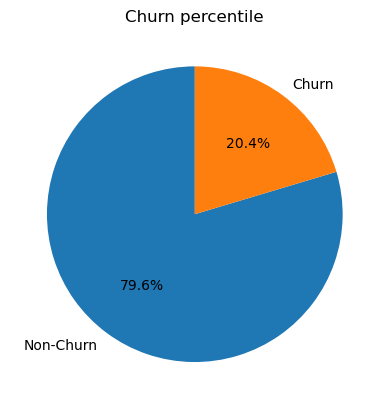

In [10]:
data_churn=data["Exited"].value_counts()
plt.pie(data_churn.values,labels=["Non-Churn","Churn"],autopct='%1.1f%%', startangle=90)
plt.title("Churn percentile")

In [11]:
#Determining the X and Y values
x=data.drop("Exited",axis=1).values
y=data["Exited"].values
print(x.shape)
print(y.shape)

(10000, 20)
(10000,)


In [12]:
# Since the ratio between Churn data is 80 - 20, I will generate synthetic data:
smt=SMOTE(random_state=42)
x_smt,y_smt=smt.fit_resample(x, y)

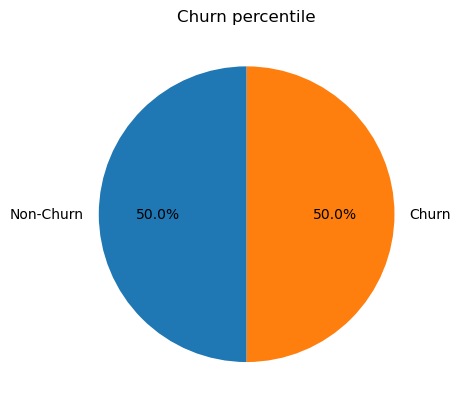

In [13]:
data_churn_smt=pd.DataFrame(y_smt,columns=["Exited"]).value_counts()
plt.pie(data_churn_smt.values,labels=["Non-Churn","Churn"],autopct='%1.1f%%', startangle=90)
plt.title("Churn percentile")
plt.show();

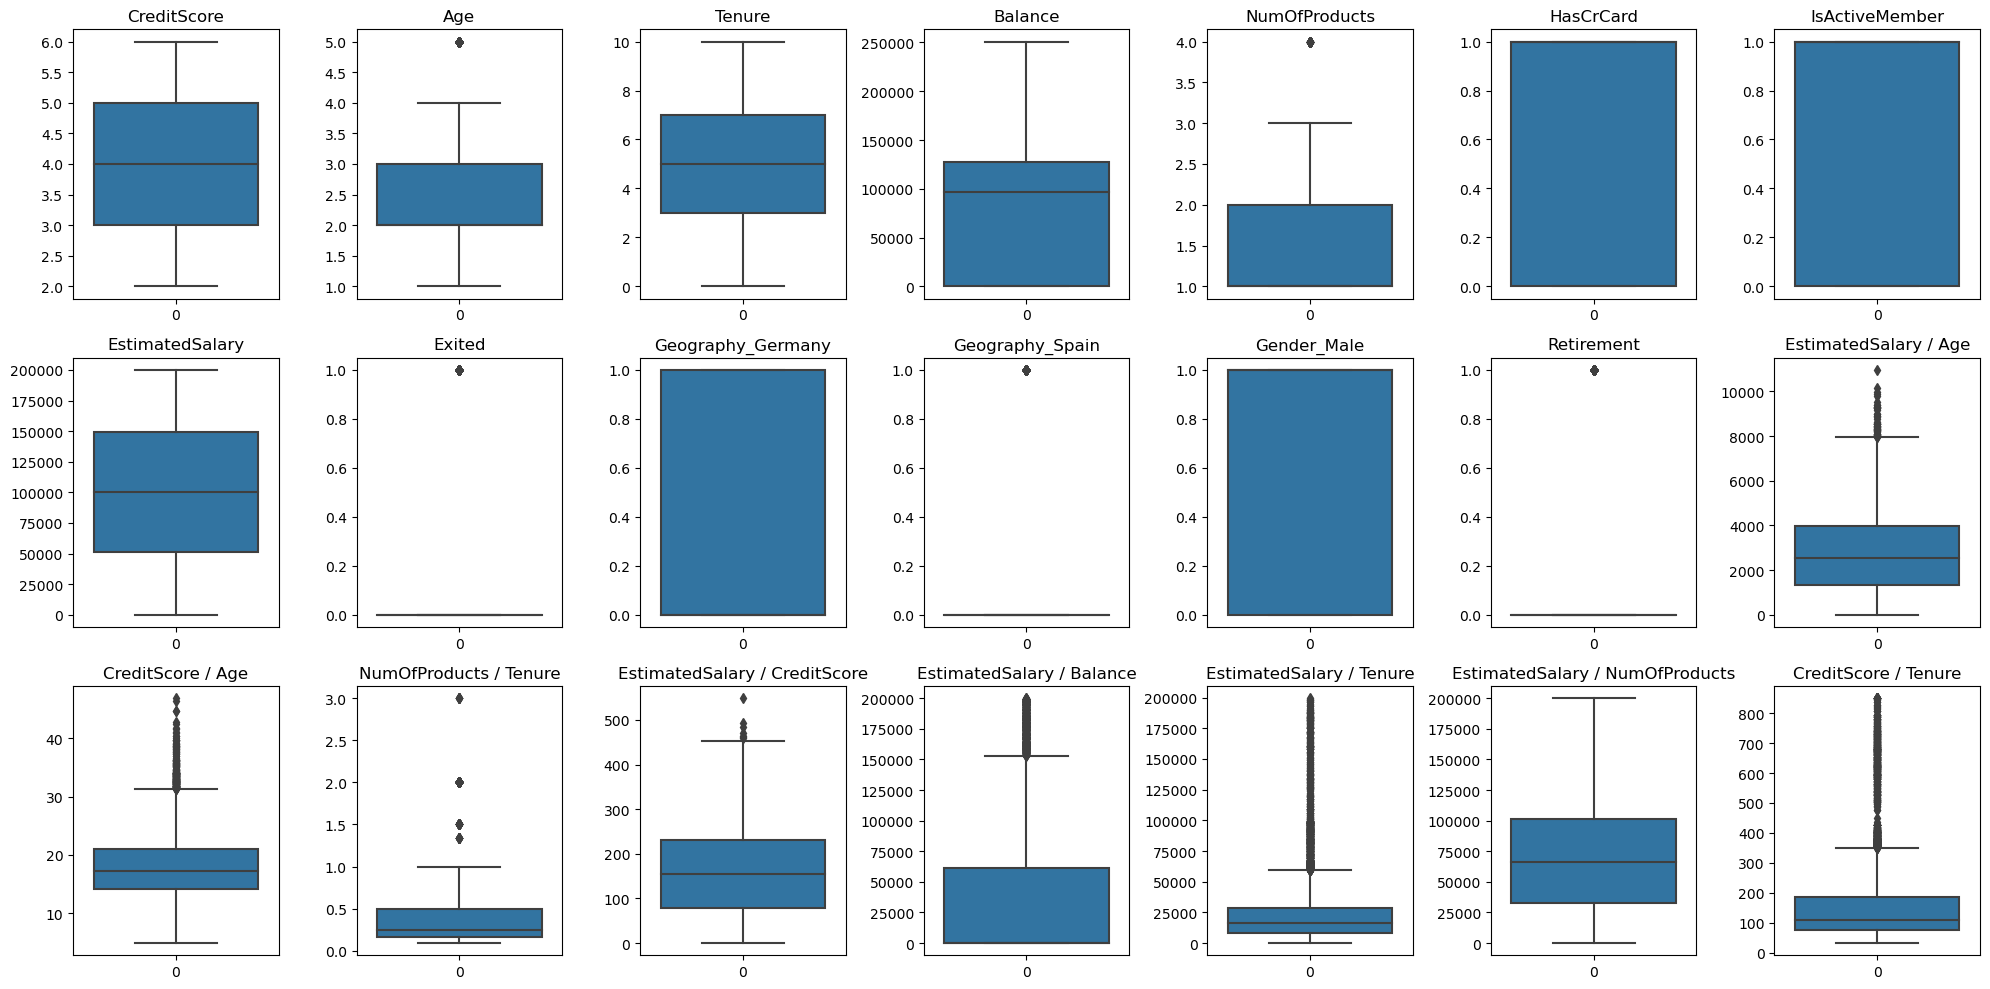

In [14]:
columns=data.columns

fig, axs = plt.subplots(nrows=3, ncols=7, figsize=(20, 10))


for i, column in enumerate(columns):
    sns.boxplot(data[column], ax=axs[i//7, i%7])
    axs[i//7, i%7].set_title(column)

plt.tight_layout()
plt.show()
    


In [15]:
#I WILL USE THE ROBUSTSCALER METHOD FOR THESE VARIABLES:
col=data.iloc[:,13:].drop("EstimatedSalary / NumOfProducts",axis=1)

col_2=RobustScaler().fit_transform(col,col.columns)
col_2=pd.DataFrame(col_2,columns=col.columns)

for item in col.columns:
    data[item]=col_2[item]
    
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,...,Gender_Male,Retirement,EstimatedSalary / Age,CreditScore / Age,NumOfProducts / Tenure,EstimatedSalary / CreditScore,EstimatedSalary / Balance,EstimatedSalary / Tenure,EstimatedSalary / NumOfProducts,CreditScore / Tenure
0,4,3,2,0.00,1,1,1,101348.88,1,0,...,0,0.0,-0.046094,-0.370690,0.25,0.060902,1.655122e+00,0.845604,101348.880,0.891654
1,4,3,1,83807.86,1,0,1,112542.58,0,0,...,0,0.0,0.078513,-0.357423,0.75,0.201687,6.819389e-08,1.950742,112542.580,1.782570
2,3,3,8,159660.80,3,1,0,113931.57,1,0,...,0,0.0,0.066391,-0.776023,0.25,0.477372,-1.020847e-05,-0.192482,37977.190,-0.481714
3,5,2,1,0.00,2,0,0,93826.63,0,0,...,0,0.0,-0.048819,0.092739,2.25,-0.133419,1.532275e+00,1.490866,46913.315,2.197622
4,6,3,2,125510.82,1,1,1,79084.10,0,0,...,0,0.0,-0.261577,0.361102,0.25,-0.404738,-1.157192e-05,0.480887,79084.100,1.594049


In [16]:
data.to_csv("Cleaning Data.csv")